<h1><center><u>Final Year Project</u></h1></center>
<center>Model Training Notebook</center>


### Name     - Sanket Madan Bairagi
### College Name - B. K. Birla College kalyan.
### Students ID - 45164      
### Class - M.Sc. In Data Science And Big Data Analytics     
### Semester - 4 (Part - II)   
### Project Name - Heart Disease Prediction
### Datset Link - https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

In [174]:
# Importing libraries and adjusting plotting settings

In [295]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
plt.rc('font', size=20) 
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20) 
plt.rc('legend', fontsize=20)    
plt.rc('figure', titlesize=20)
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')
%config Completer.use_jedi = False
%matplotlib inline

In [357]:
df = pd.read_csv('https://raw.githubusercontent.com/SanketBairagi/FinalPro/main/heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [358]:
# data Processing and onehot coding and Feature Engineering

In [359]:
cols_yes__no_values = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity',
                       'Asthma', 'KidneyDisease', 'SkinCancer']
yes__no_values = {'No':0, 'Yes':1}
for i in range(0, len(cols_yes__no_values)):
    df[cols_yes__no_values[i]] = df[cols_yes__no_values[i]].replace(yes__no_values)

In [360]:
sex = {'Female':0, 'Male':1}
df['Sex'] = df['Sex'].replace(sex)

ageCategory= {'18-24':0, '25-29':1, '30-34':2, '35-39':3, '40-44':4, '45-49':5, '50-54':6, '55-59':7, '60-64':8,
             '65-69':9, '70-74':10, '75-79':11, '80 or older':12}
df['AgeCategory'] = df['AgeCategory'].replace(ageCategory)

genHealth = {'Poor':0, 'Fair':1, 'Good':2, 'Very good':3, 'Excellent':4}
df['GenHealth'] = df['GenHealth'].replace(genHealth)

diabetic = {'No':0, 'No, borderline diabetes':1, 'Yes (during pregnancy)':2, 'Yes':3}
df['Diabetic'] = df['Diabetic'].replace(diabetic)

In [361]:
data=df

In [362]:
data["BMICAT"]= data.apply(lambda x:"under weight" if x["BMI"]<18.5 else x["BMI"],axis=1)


In [363]:
data["BMICAT"]= data.apply(lambda x:"Noraml weight" if 18.5<=x["BMI"]<25.0 else x["BMICAT"],axis=1)

In [364]:
data["BMICAT"]= data.apply(lambda x:"over weight" if 25.0<=x["BMI"]<30.0 else x["BMICAT"],axis=1)

In [365]:
data["BMICAT"]= data.apply(lambda x:"obese" if x["BMI"]>=30.0 else x["BMICAT"],axis=1)

In [366]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMICAT
0,0,16.60,1,0,0,3.0,30.0,0,0,7,White,3,1,3,5.0,1,0,1,under weight
1,0,20.34,0,0,1,0.0,0.0,0,0,12,White,0,1,3,7.0,0,0,0,Noraml weight
2,0,26.58,1,0,0,20.0,30.0,0,1,9,White,3,1,1,8.0,1,0,0,over weight
3,0,24.21,0,0,0,0.0,0.0,0,0,11,White,0,0,2,6.0,0,0,1,Noraml weight
4,0,23.71,0,0,0,28.0,0.0,1,0,4,White,0,1,3,8.0,0,0,0,Noraml weight


In [367]:
bmicat = {'under weight':0, 'Noraml weight':1, 'over weight':2, 'obese':3}
data['BMICAT'] = data['BMICAT'].replace(bmicat)

In [368]:
# deleting unnecessary columns 

In [369]:
data=data.drop("BMI",axis=1)

In [370]:
data=data.drop("Race",axis=1)

In [371]:
data.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMICAT
0,0,1,0,0,3.0,30.0,0,0,7,3,1,3,5.0,1,0,1,0
1,0,0,0,1,0.0,0.0,0,0,12,0,1,3,7.0,0,0,0,1
2,0,1,0,0,20.0,30.0,0,1,9,3,1,1,8.0,1,0,0,2
3,0,0,0,0,0.0,0.0,0,0,11,0,0,2,6.0,0,0,1,1
4,0,0,0,0,28.0,0.0,1,0,4,0,1,3,8.0,0,0,0,1


In [372]:
data.duplicated().sum()

147396

In [373]:
data=data.drop_duplicates()
data.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMICAT
0,0,1,0,0,3.0,30.0,0,0,7,3,1,3,5.0,1,0,1,0
1,0,0,0,1,0.0,0.0,0,0,12,0,1,3,7.0,0,0,0,1
2,0,1,0,0,20.0,30.0,0,1,9,3,1,1,8.0,1,0,0,2
3,0,0,0,0,0.0,0.0,0,0,11,0,0,2,6.0,0,0,1,1
4,0,0,0,0,28.0,0.0,1,0,4,0,1,3,8.0,0,0,0,1


In [374]:
# handelling unbalanced data


In [375]:
dfno=data.loc[data["HeartDisease"] == 0]

In [376]:
dfyes=data.loc[data["HeartDisease"] == 1]

In [377]:
dfno.duplicated().sum()

0

In [378]:
dfyes.duplicated().sum()

0

In [379]:
dfno=dfno.sample(n =48420 , replace = False)

In [380]:
dfno.duplicated().sum()

0

In [381]:
dfyes.shape

(23421, 17)

In [382]:
dfno=dfno[:23421]

In [383]:
dfno

,HeartDisease,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMICAT
42481,0,0,0,0,8.0,5.0,1,1,12,0,0,2,7.0,0,0,1,2
30179,0,1,0,0,0.0,0.0,0,1,3,0,0,2,8.0,0,0,0,1
192905,0,0,0,0,2.0,0.0,0,1,8,0,1,2,4.0,0,0,0,3
123360,0,1,1,0,1.0,0.0,1,0,9,3,0,2,8.0,1,0,0,3
185245,0,0,0,0,0.0,0.0,0,1,8,0,1,2,5.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308291,0,1,0,0,30.0,10.0,1,1,6,0,0,0,5.0,0,0,0,2
188014,0,1,0,0,3.0,0.0,1,0,10,3,1,1,5.0,0,1,1,2
84865,0,0,0,0,0.0,3.0,0,1,9,0,1,1,7.0,0,0,0,3
181215,0,1,0,0,8.0,0.0,1,1,11,3,1,2,7.0,1,0,1,2


In [384]:
dfno.duplicated().sum()

0

In [385]:
dfno.shape

(23421, 17)

In [386]:
dfyes.shape

(23421, 17)

In [387]:
df5=pd.concat([dfno,dfyes],axis=0)

In [388]:
df5 = df5.sample(frac = 1)

In [389]:
df5.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMICAT
99164,1,1,1,0,0.0,0.0,0,1,12,3,1,2,4.0,0,0,0,1
255,0,1,0,0,0.0,0.0,0,1,11,0,0,2,8.0,0,0,1,1
240016,1,1,0,0,0.0,0.0,0,1,7,3,0,2,7.0,0,1,0,3
90654,1,1,0,1,30.0,0.0,1,0,8,0,0,1,9.0,1,0,0,1
106931,0,0,0,0,0.0,5.0,0,0,7,0,1,3,2.0,0,0,0,1


In [390]:
df5.duplicated().sum()

0

In [391]:
newdata=df5

In [392]:
newdata

,HeartDisease,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMICAT
99164,1,1,1,0,0.0,0.0,0,1,12,3,1,2,4.0,0,0,0,1
255,0,1,0,0,0.0,0.0,0,1,11,0,0,2,8.0,0,0,1,1
240016,1,1,0,0,0.0,0.0,0,1,7,3,0,2,7.0,0,1,0,3
90654,1,1,0,1,30.0,0.0,1,0,8,0,0,1,9.0,1,0,0,1
106931,0,0,0,0,0.0,5.0,0,0,7,0,1,3,2.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2854,1,1,1,1,30.0,30.0,1,1,8,0,1,0,4.0,1,0,0,2
47164,1,0,0,0,30.0,0.0,1,1,9,3,0,1,5.0,0,0,0,3
273273,0,0,0,0,2.0,1.0,0,0,8,2,1,2,8.0,1,0,0,1
20323,0,0,0,0,0.0,2.0,0,0,11,0,1,2,9.0,0,0,0,1


In [393]:
# 

In [394]:
X = newdata.loc[:,newdata.columns != 'HeartDisease']
X.head()

,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMICAT
99164,1,1,0,0.0,0.0,0,1,12,3,1,2,4.0,0,0,0,1
255,1,0,0,0.0,0.0,0,1,11,0,0,2,8.0,0,0,1,1
240016,1,0,0,0.0,0.0,0,1,7,3,0,2,7.0,0,1,0,3
90654,1,0,1,30.0,0.0,1,0,8,0,0,1,9.0,1,0,0,1
106931,0,0,0,0.0,5.0,0,0,7,0,1,3,2.0,0,0,0,1


In [395]:
y = newdata.HeartDisease
y

99164     1
255       0
240016    1
90654     1
106931    0
         ..
2854      1
47164     1
273273    0
20323     0
110402    0
Name: HeartDisease, Length: 46842, dtype: int64

In [396]:
X.describe()

,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMICAT
count,46842.000000,46842.000000,46842.000000,46842.000000,46842.000000,46842.000000,46842.000000,46842.000000,46842.000000,46842.000000,46842.000000,46842.000000,46842.000000,46842.000000,46842.000000,46842.000000
mean,0.527710,0.074826,0.115708,7.252786,5.880556,0.308142,0.490820,7.735430,0.829576,0.654028,1.991888,7.047137,0.204368,0.099633,0.153687,2.088788
std,0.499237,0.263113,0.319878,10.854452,9.583057,0.461731,0.499921,3.368713,1.308587,0.475689,1.131035,1.799437,0.403243,0.299513,0.360652,0.850416
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.000000,2.000000,7.000000,0.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,0.000000,10.000000,7.000000,1.000000,1.000000,10.000000,3.000000,1.000000,3.000000,8.000000,0.000000,0.000000,0.000000,3.000000
max,1.000000,1.000000,1.000000,30.000000,30.000000,1.000000,1.000000,12.000000,3.000000,1.000000,4.000000,24.000000,1.000000,1.000000,1.000000,3.000000


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=111)

In [397]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=111)

In [398]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train[["PhysicalHealth","MentalHealth","AgeCategory","Diabetic","GenHealth","SleepTime","BMICAT"]] = mms.fit_transform(X_train[["PhysicalHealth","MentalHealth","AgeCategory","Diabetic","GenHealth","SleepTime","BMICAT"]])
X_test[["PhysicalHealth","MentalHealth","AgeCategory","Diabetic","GenHealth","SleepTime","BMICAT"]] = mms.transform(X_test[["PhysicalHealth","MentalHealth","AgeCategory","Diabetic","GenHealth","SleepTime","BMICAT"]])

In [399]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((37473, 16), (9369, 16), (37473,), (9369,))

In [400]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC, LinearSVC

models = {
    "DT":DecisionTreeClassifier(random_state = 110, max_depth=15),
    "Logistic": LogisticRegression(random_state = 42),
    "SGD": SGDClassifier(random_state = 111),
    "RF":RandomForestClassifier(random_state = 221, max_depth=20),
}
results = pd.DataFrame(columns=['Model', 'Train Score','Test Score','Recall','Precision','f1-score'])
def test_models(X_train, X_test, y_train, y_test):
    for model in models:
        fit = models[model].fit(X_train, y_train)
        fig, ax = plt.subplots(figsize=(5, 5))
        ax.set_title(model)
        metrics.plot_confusion_matrix(fit, X_test, y_test, cmap='Blues', normalize='true', ax=ax)
        plt.show()
        train_score = round(fit.score(X_train, y_train),3)
        test_score = round(fit.score(X_test, y_test),3)
        recall = round(metrics.recall_score(y_test, fit.predict(X_test))*100,2)
        precision = round(metrics.precision_score(y_test, fit.predict(X_test))*100,2)
        f1 = round(metrics.f1_score(y_test, fit.predict(X_test))*100,2)
        results.loc[len(results.index)] = [model, train_score, test_score, recall, precision, f1]

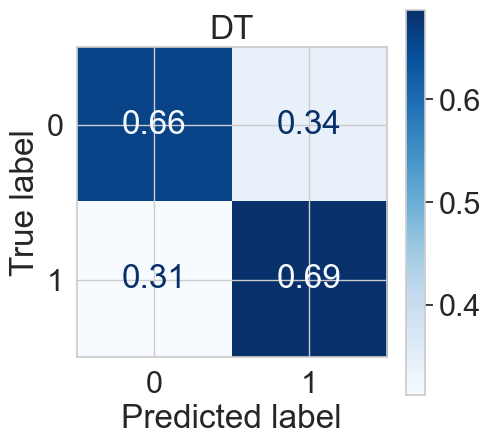

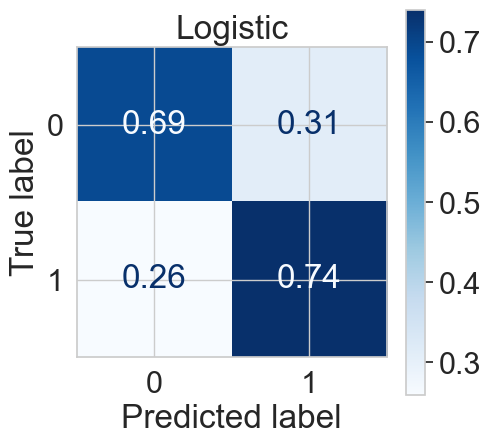

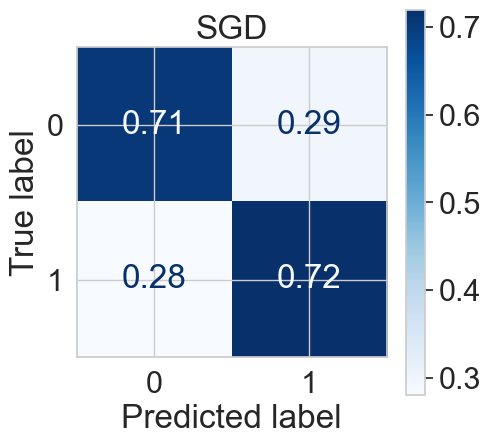

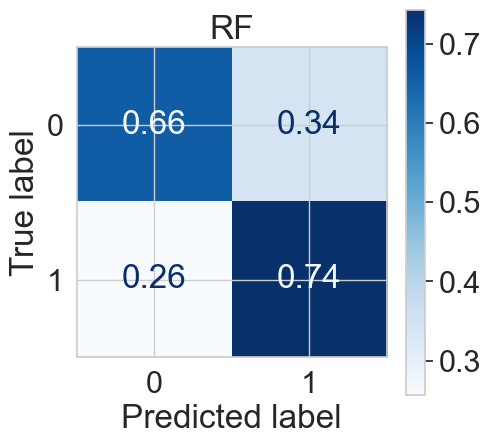

In [401]:
test_models(X_train, X_test, y_train, y_test)

In [402]:
results

,Model,Train Score,Test Score,Recall,Precision,f1-score
0,DT,0.845,0.673,68.69,66.98,67.83
1,Logistic,0.725,0.716,74.03,70.75,72.35
2,SGD,0.723,0.713,71.97,71.13,71.55
3,RF,0.966,0.701,74.30,68.74,71.41


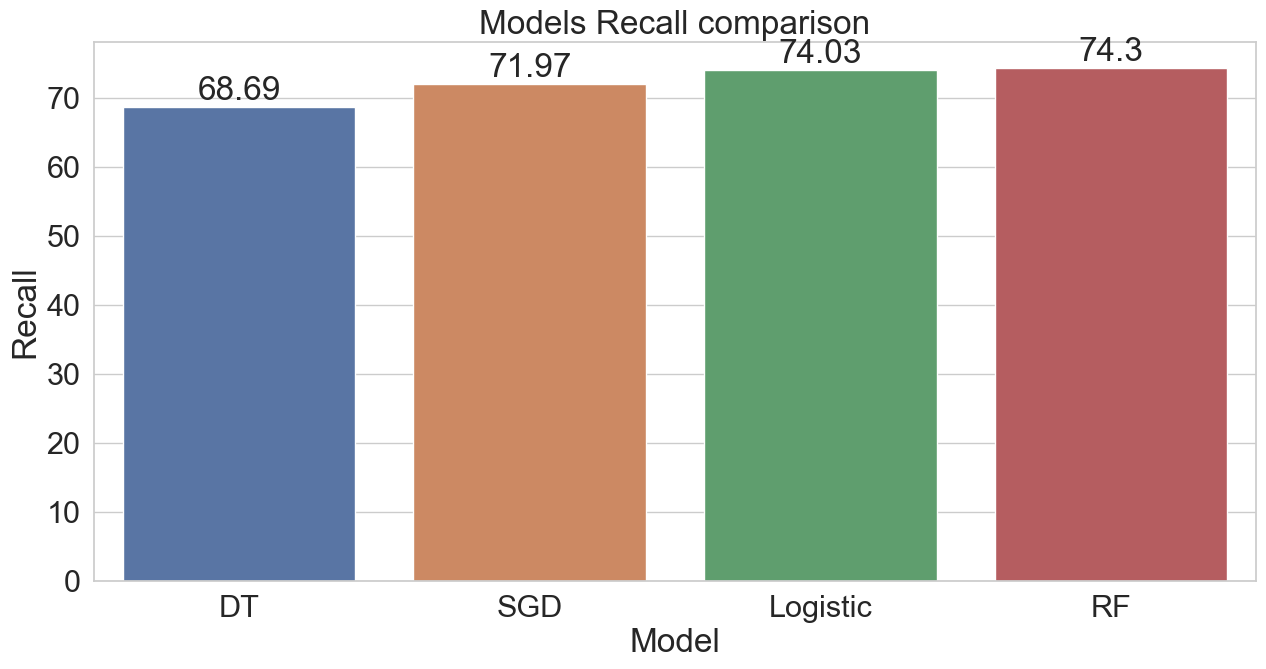

In [485]:
plt.figure(figsize=(15, 7))
plt.rc('font', size=10) 
plt.rc('axes', titlesize=10)
plt.rc('axes', labelsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10) 
plt.rc('legend', fontsize=10)    
plt.rc('figure', titlesize=10)
sns.set_theme(style="whitegrid", font_scale=2)
ax = sns.barplot(x='Model', y="Recall", data=results,order=results.sort_values("Recall").Model)
ax.bar_label(ax.containers[0], label_type='edge')
ax.set_title('Models Recall comparison')
plt.show()

In [489]:
logreg = LogisticRegression(random_state = 42,max_iter=100)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [490]:
y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)

In [491]:
pd.DataFrame(zip(y_train, y_pred_train), columns=['Actual','Predicted'])

,Actual,Predicted
0,1,1
1,0,0
2,1,1
3,0,0
4,1,0
...,...,...
37468,0,1
37469,0,1
37470,0,1
37471,1,1


In [492]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [493]:
accuracy_score(y_train, y_pred_train)

0.7250820590825394

In [494]:
accuracy_score(y_test, y_pred_test)

0.7158714910876294

In [495]:
confusion_matrix(y_test, y_pred_test)

array([[3224, 1440],
       [1222, 3483]], dtype=int64)

In [496]:
newdata.columns

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma',
       'KidneyDisease', 'SkinCancer', 'BMICAT'],
      dtype='object')

0.7157642229444607


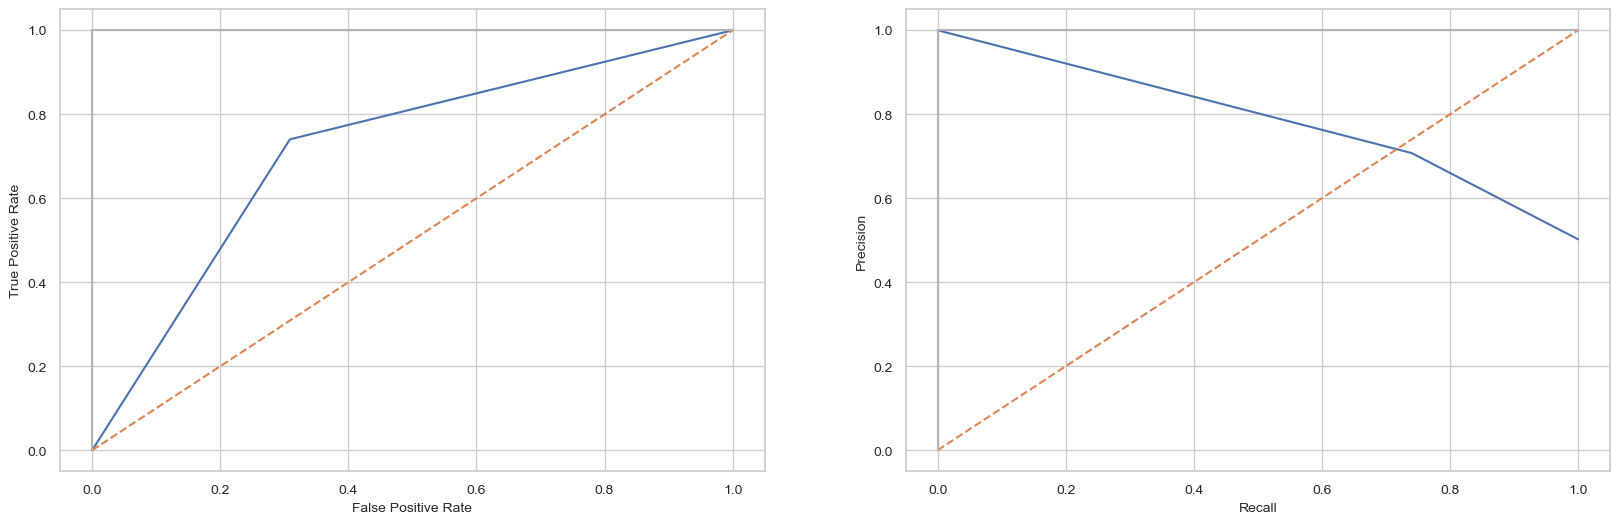

In [497]:
fpr_log,tpr_log,thres_log = roc_curve(y_test, y_pred_test)
log_precision, log_recall, log_thres = precision_recall_curve(y_test, y_pred_test)


fig, ax = plt.subplots(1,2,figsize=(20,6))
ax[0].plot(fpr_log,tpr_log)
ax[0].plot([0, 1], ls="--")
ax[0].plot([0, 0], [1, 0] , c=".7")
ax[0].plot([1, 1] , c=".7")
ax[0].set_ylabel('True Positive Rate')
ax[0].set_xlabel('False Positive Rate')
print(roc_auc_score(y_test, y_pred_test))


ax[1].plot(log_recall,log_precision)
ax[1].plot([0, 1], ls="--")
ax[1].plot([0, 0], [1, 0] , c=".7")
ax[1].plot([1, 1] , c=".7")
ax[1].set_ylabel('Precision')
ax[1].set_xlabel('Recall')
plt.show()

In [498]:
print(roc_auc_score(y_test, y_pred_test))

0.7157642229444607


import pickle

filename = '4may.sav'
pickle.dump(logreg, open(filename, 'wb'))

In [499]:
numbers = [float(x)/10 for x in range(10)]
numbers

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [500]:
y_pred_test = logreg.predict_proba(X_test)[:,1]

In [501]:
pred_val = np.where(logreg.predict_proba(X_test)[:,1] > 0.50, 1, 0)

In [502]:
cutoff_df = pd.DataFrame(zip(y_test, y_pred_test, pred_val), columns=['Actual','Predicted_Prob', 'Predicted'])
cutoff_df

,Actual,Predicted_Prob,Predicted
0,1,0.505171,1
1,1,0.648828,1
2,1,0.447314,0
3,1,0.331623,0
4,1,0.377088,0
...,...,...,...
9364,1,0.812665,1
9365,1,0.946880,1
9366,1,0.451713,0
9367,0,0.341375,0


In [503]:
# Let's calculate Sensitivity, Specificity and accuracy with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    cutoff_df[i]= cutoff_df.Predicted_Prob.map(lambda x: 1 if x > i else 0)
cutoff_df.head()

,Actual,Predicted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.505171,1,1,1,1,1,1,1,0,0,0,0
1,1,0.648828,1,1,1,1,1,1,1,1,0,0,0
2,1,0.447314,0,1,1,1,1,1,0,0,0,0,0
3,1,0.331623,0,1,1,1,1,0,0,0,0,0,0
4,1,0.377088,0,1,1,1,1,0,0,0,0,0,0


In [504]:
cutoff_df.shape

(9369, 13)

In [505]:
from sklearn.metrics import confusion_matrix
# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
cutoff_df1 = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
for i in num:
    cm1 = confusion_matrix(cutoff_df.Actual, cutoff_df[i])
    total1=sum(sum(cm1))
    Accuracy = (cm1[0,0]+cm1[1,1])/total1
    Specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    Sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df1.loc[i] =[ i ,Accuracy,Sensitivity,Specificity]

In [506]:
cutoff_df1

,prob,accuracy,sensi,speci
0.0,0.0,0.502188,1.000000,0.000000
0.1,0.1,0.570712,0.986823,0.150943
0.2,0.2,0.642972,0.956429,0.326758
0.3,0.3,0.683958,0.913284,0.452616
0.4,0.4,0.712669,0.845484,0.578688
0.5,0.5,0.715871,0.740276,0.691252
0.6,0.6,0.701676,0.610414,0.793739
0.7,0.7,0.662184,0.440383,0.885935
0.8,0.8,0.592166,0.234006,0.953473
0.9,0.9,0.524602,0.061849,0.991424


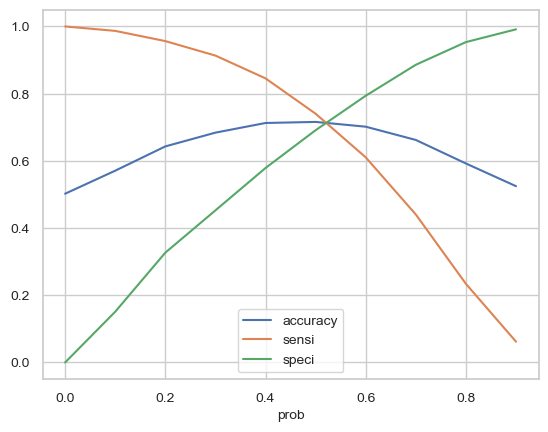

In [507]:
# Let's plot it as well
plt.rc('font', size=10) 
plt.rc('axes', titlesize=10)
plt.rc('axes', labelsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10) 
plt.rc('legend', fontsize=10)    
plt.rc('figure', titlesize=10)
cutoff_df1.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [508]:
preds3 = np.where(logreg.predict_proba(X_test)[:,1] > 0.51, 1, 0)
preds3

array([0, 1, 0, ..., 0, 0, 0])

In [509]:
accuracy_score(y_test, preds3)

0.7161916960187854

In [510]:
preds3 = np.where(logreg.predict_proba(X_test)[:,1] > 0.5, 1, 0)
preds3

array([1, 1, 0, ..., 0, 0, 0])

In [511]:
accuracy_score(y_test, preds3)

0.7158714910876294